In [1]:
import sys
import os
import pandas as pd
from pprint import pprint
wd = %pwd
parent = os.path.dirname(wd)
fdel = os.path.sep
sys.path.append(parent+fdel+"src")
from tedata import TE_Scraper

INFO - tedata package initialized successfully!


In [ ]:
from tedata import base
base.find_active_drivers(quit_all=True)

In [11]:
# Test the scaling plot
url = 'https://tradingeconomics.com/united-states/personal-income'
scr = TE_Scraper(use_existing_driver = False, headless = True)  ## Initialize a new TE_scraper object.
scr.load_page(url, extra_wait_time=10) 

scr.scrape_metadata() ## Scrape the metadata for the data series from the page.
scr.make_x_index(force_rerun_freqdet=True, force_rerun_xlims=True)
scr.get_y_axis(set_global_y_axis=True) 

The geckodriver version (0.35.0) detected in PATH at /usr/local/bin/geckodriver might not be compatible with the detected firefox version (135.0.1); currently, geckodriver 0.36.0 is recommended for firefox 135.*, so it is advised to delete the driver in PATH and retry
INFO - New firefox webdriver created.
INFO - Chart types dictionary created successfully: dict_keys(['Column', 'Spline', 'Areaspline', 'Stepline', 'Line', 'Area'])
INFO - Date span set to: 1Y
INFO - 
Series metadata: 
 {'units': '%', 'original_source': 'U.S. Bureau of Economic Analysis', 'title': 'United States Personal Income', 'indicator': 'personal income', 'country': 'united states', 'source': 'Trading Economics', 'id': 'united-states/personal-income'}


Using selenium and tooltip scraping to construct the date time index for the time-series, this'll take a bit...


INFO - Chart type set to: Spline


Time taken to select chart type: 1.7530559039951186
Time taken to load JS code: 0.000293823002721183


INFO - JS Console: Starting cursor movement, target points: 10
INFO - JS Console: Using increment: 5px
INFO - JS Console: Using wait time: 25ms
INFO - JS Console: Chart dimensions: [object DOMRect]
INFO - JS Console: Found data point: Jan 2025 = 0.9%
INFO - JS Console: Found data point: Dec 2024 = 0.4%
INFO - JS Console: Found data point: Nov 2024 = 0.3%
INFO - JS Console: Found data point: Oct 2024 = 0.6%
INFO - JS Console: Found data point: Sep 2024 = 0.3%
INFO - JS Console: Found data point: Aug 2024 = 0.1%
INFO - JS Console: Found data point: Jul 2024 = 0.2%
INFO - JS Console: Found data point: Jun 2024 = 0.2%
INFO - JS Console: Found data point: May 2024 = 0.3%
INFO - JS Console: Found data point: Apr 2024 = 0.1%
INFO - JS Console: Collected 10 points, finishing...


Time taken to execute JS code: 2.5311823550000554
Latest dates:  ['Jan 2025', 'Dec 2024', 'Nov 2024', 'Oct 2024', 'Sep 2024', 'Aug 2024', 'Jul 2024', 'Jun 2024', 'May 2024', 'Apr 2024']
Frequency of time-series:  MS
get_xlims_from_tooltips method: date_span:  1Y , chart_type: splineChart


INFO - Chart type set to: Spline


Got chart dimensions and plot background element.


INFO - Start and end values scraped from tooltips: 
{'start_date': Timestamp('1959-02-01 00:00:00'), 'start_value': 0.5, 'unit_str': '%', 'end_date': Timestamp('2025-01-01 00:00:00'), 'end_value': 0.9}
INFO - DateTimeIndex created successfully for the time-series.
INFO - Y-axis values scraped successfully.


Start and end dates scraped from tooltips:  {'start_date': Timestamp('1959-02-01 00:00:00'), 'start_value': 0.5, 'unit_str': '%', 'end_date': Timestamp('2025-01-01 00:00:00'), 'end_value': 0.9}
y_heights:  [335.5, 320.5, 269.5, 217.5, 165.5, 114.5, 62.5, 39.5]
pixheights:  [335.5, 320.5, 269.5, 217.5, 165.5, 114.5, 62.5, 39.5]


pixheight
335.5   -16.0
320.5   -14.0
269.5    -7.0
217.5     0.0
165.5     7.0
114.5    14.0
62.5     21.0
39.5     24.0
Name: ytick_label, dtype: float64

In [51]:
scr.series_from_chart_soup(set_max_datespan=True) ## Get the full series from the path element of the data trace on the svg chart.
scr.series

INFO - Series path extraction method: Extracting series data from chart soup.
INFO - Date span: MAX. Chart type: splineChart, URL: https://tradingeconomics.com/united-states/personal-income.


0.000000      213.3125
0.000000      213.3125
0.468915      212.3975
0.781525      211.8375
1.127629      211.2175
                ...   
670.799801    214.7875
671.134740    214.0500
671.480844    213.3125
672.000000    210.3625
672.000000    210.3625
Name: Extracted Series, Length: 2374, dtype: float64

In [53]:
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [11, 4]
plt.rcParams['figure.dpi'] = 140

In [52]:
scr.apply_x_index()

INFO - DateTimeIndex applied to series, series attribute updated.


In [54]:
scr.series

1959-02-01    213.3125
1959-03-01    211.8375
1959-04-01    210.3625
1959-05-01    212.5750
1959-06-01    212.5750
                ...   
2024-09-01    214.7875
2024-10-01    212.5750
2024-11-01    214.7875
2024-12-01    214.0500
2025-01-01    210.3625
Freq: MS, Name: personal income, Length: 792, dtype: float64

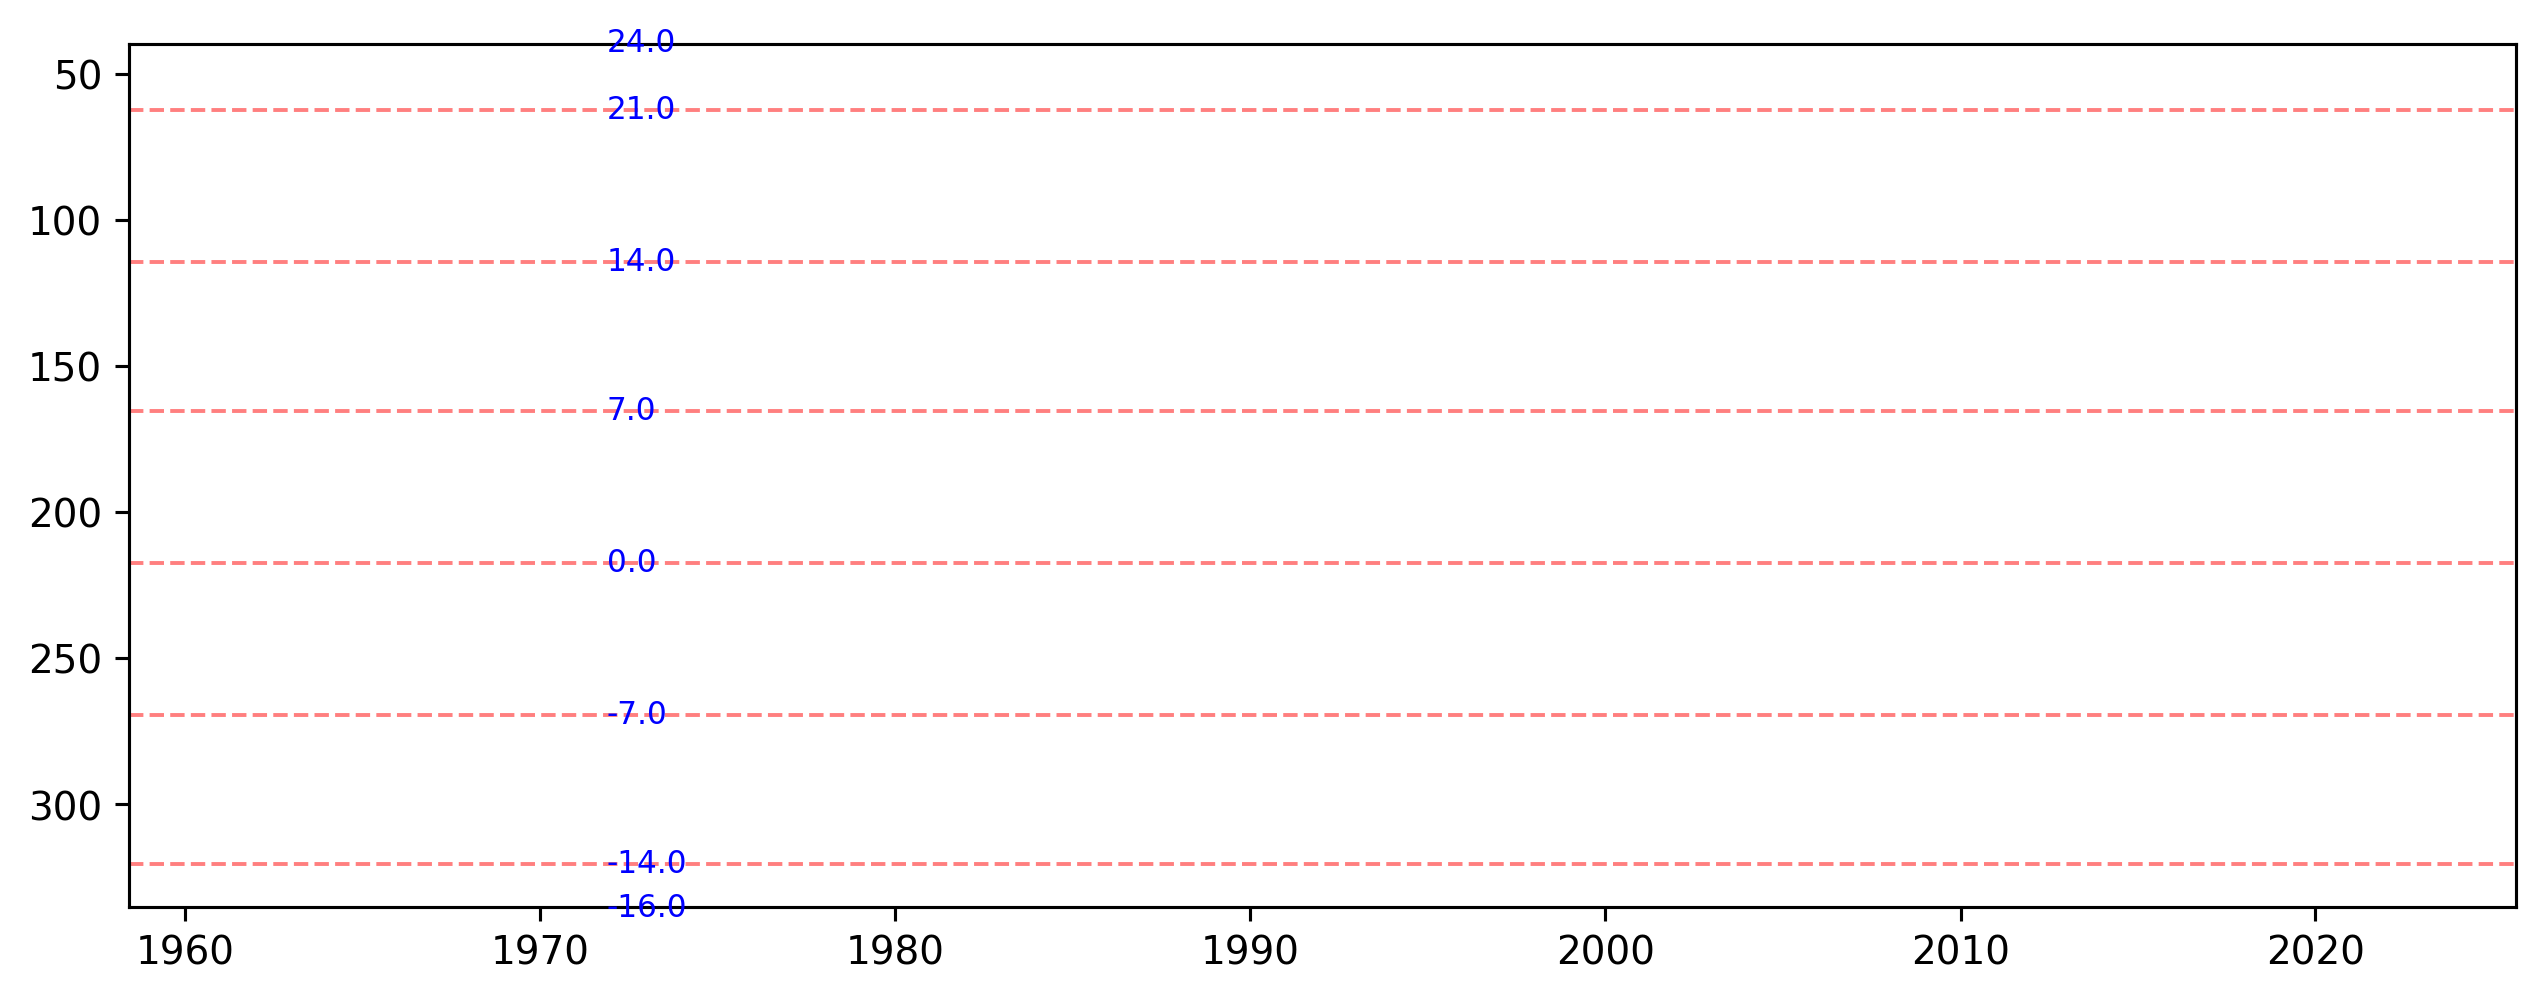

In [60]:
fig, ax = plt.subplots()
ax.invert_yaxis()
ax.plot(scr.series, label = 'Unscaled series', lw = 1, c = 'black')
ax.set_ylim(scr.axis_limits["y_min"], scr.axis_limits["y_max"])
ax.margins(0.01, 0.02)
for px_pos, value in zip(scr.y_axis.index, scr.y_axis.values):
    ax.axhline(y=px_pos, color='r', linestyle='--', alpha=0.5, lw = 1)
    ax.text(max(scr.unscaled_series.index)+10, px_pos, 
            f"{value}", va='center', ha='left', fontsize=8, color='b')

In [56]:
scr.scale_series()

INFO - Scale series method: Start value, end value: 0.5, 0.9, pix0, pix1: 213.3125, 210.3625, 
data units per chart pixel from start & end points: 0.13559322033898358, 
unit_per_pix calculated from the y axis ticks: 0.13458915338710736, 
inverse of that: 7.430019246229931, 
unit_per_pix from axis limits and self.y_axis (probably best way): 0.13513513513513514
yaxis top tick: 24.0, yaxis bot tick: -16.0
axis_limits: 335.0, 40.0
INFO - Y axis Series does cross zero at:  217.5, min_val: 0, pix0: 217.5


Unit per pix forumlation, 24.0, -16.0, 40.0, 296.0, 40.0, 335.0, 0.13513513513513514
pixheight
335.5   -16.0
320.5   -14.0
269.5    -7.0
217.5     0.0
165.5     7.0
114.5    14.0
62.5     21.0
39.5     24.0
Name: ytick_label, dtype: float64 217.5


1959-02-01    0.565878
1959-03-01    0.565878
1959-04-01    0.689527
1959-05-01    0.765203
1959-06-01    0.848986
                ...   
2024-09-01    1.163851
2024-10-01    0.665541
2024-11-01    0.665541
2024-12-01    0.665541
2025-01-01    0.681419
Freq: MS, Name: personal income, Length: 792, dtype: float64

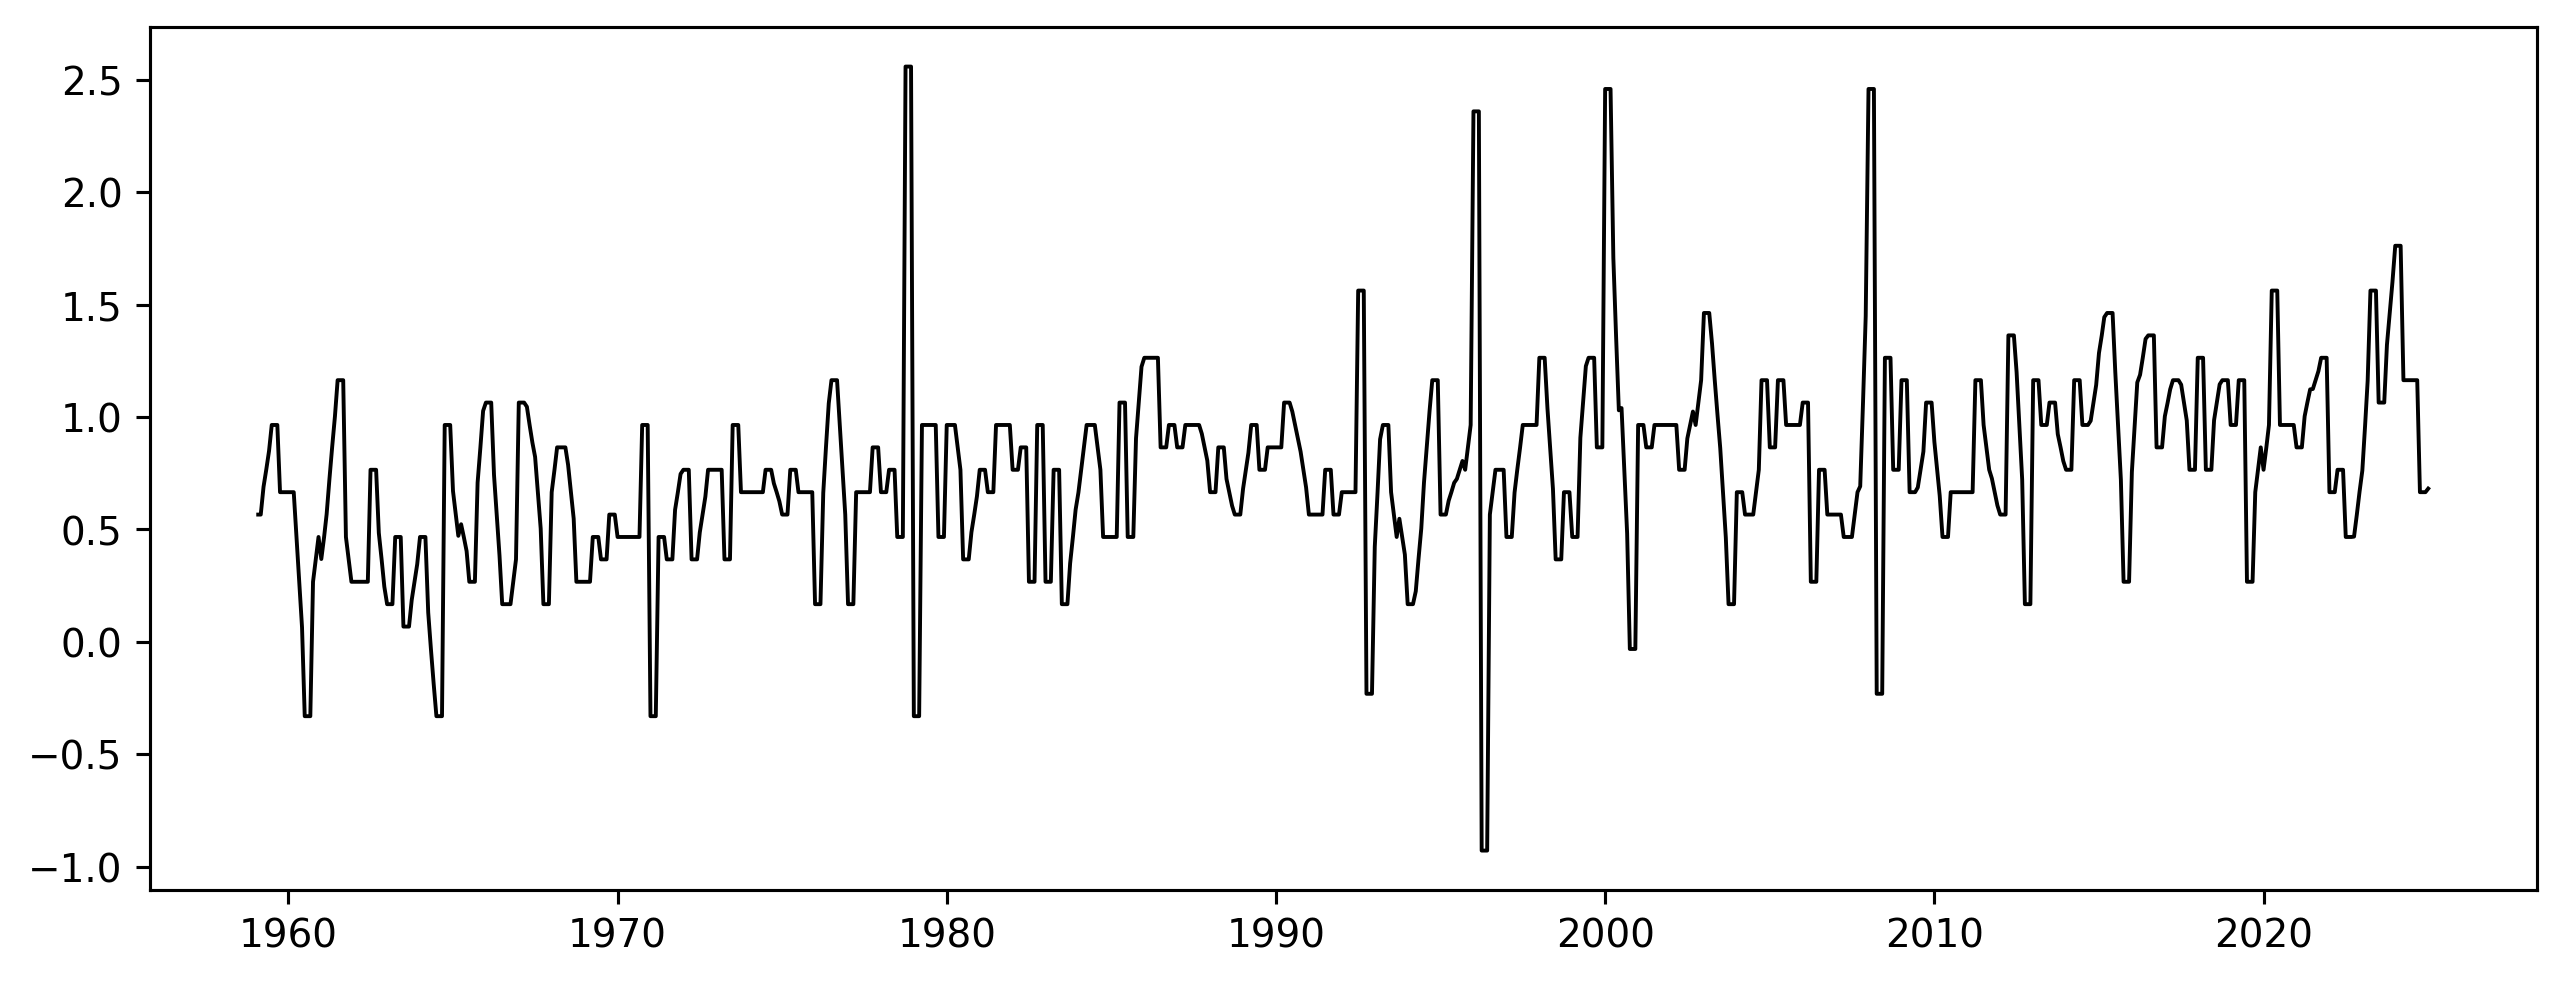

In [59]:
fig2, ax2 = plt.subplots()
ax2.plot(scr.series, label = 'Scaled_series', lw = 1, c = 'black')